# A Gaussian linear model

Now we move on to a simple linear model. Consider the following linear regression model:

$$
y\sim N(\mu,\sigma^{2})
$$
$$
\mu=a+bx
$$

Here, $x$ is the independent variable and $y$ is the dependent variable. Given a data set of values for $x,y$ the task is to infer the values of $a,b$ and $\sigma$.

1. Try to understand the code. The variable m is a so-called deterministic variable. What does that mean?

2. Examine the output. Is the result as expected?

3. Draw the graphical model, including latent variables, data and hyperparameters. 

4. Change the paramaters of the prior and the number of data points and examine their effect.

5. Add a second independent variable to the model, with appropriate priors for the added parameter. The model is now:
$$
y\sim N(\mu,\sigma^{2})
$$
$$
\mu=a+bx_{1}+cx_{2}
$$

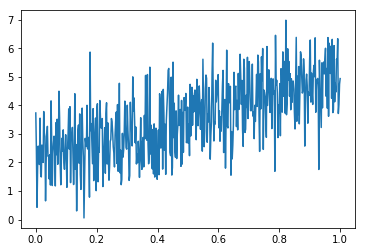

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -716.34: 100%|██████████| 200000/200000 [00:17<00:00, 11717.85it/s]
Finished [100%]: Average ELBO = -716.32
100%|██████████| 1000/1000 [00:03<00:00, 329.34it/s]



a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.117            0.088            0.005            [1.944, 2.288]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.944          2.059          2.121          2.173          2.288


b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.865            0.150            0.009            [2.563, 3.140]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.576          2.764          2.864          2.963          3.164


s:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------

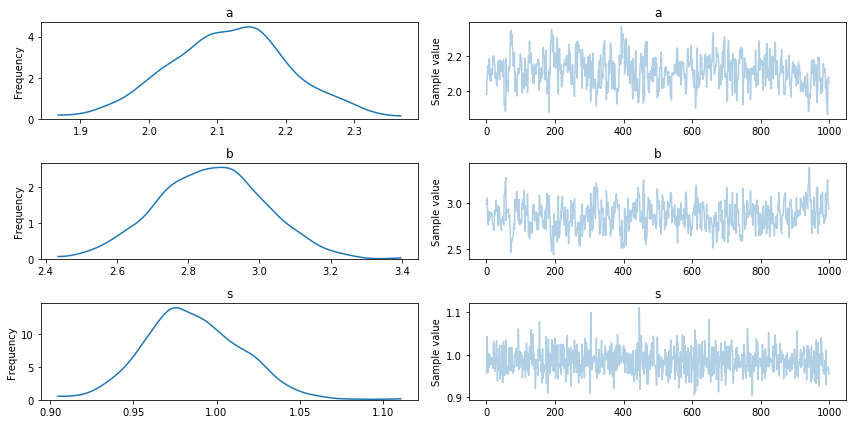

In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# True values for a,b,sigma
ts=1
ta=2
tb=3

# Generate some data for y,x1,x2 and given a,b,c,sigma
n=500 # number of data points
x=np.linspace(0,1,n)
y=ta + tb*x
y=y + np.random.normal(0, ts, n)

plt.plot(x,y)
plt.show()

# Create pyMC3 model object
linear_model = pm.Model()

with linear_model:
    # Priors
    a=pm.Normal('a', mu=0, sd=1)
    b=pm.Normal('b', mu=0, sd=1)
    s=pm.HalfNormal('s', sd=1)
    
    # m is a "deterministic variable"
    m=a + b*x
    
    # Likelihood
    y_obs=pm.Normal("y_obs", mu=m, sd=s, observed=y)

    trace = pm.sample(1000)

    pm.summary(trace)
    pm.traceplot(trace)
    plt.show()
